# Don't Drop Out Of Numpy

In [1]:
pwd

'/Users/joshuacook/src/src/PCA-tutorial/ipynb'

In [2]:
cd ..

/Users/joshuacook/src/src/PCA-tutorial


In [3]:
from lib.preprocessing import BoxCoxTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


This lesson will make heavy use of the numerical python library, `numpy`. Remember, its very important when working in `numpy` that you do not "drop out of `numpy`" that is change your data into regular lists.

In [4]:
type([1,2])

list

In [5]:
type(np.array([1,2]))

numpy.ndarray

The most common way to "drop out of `numpy`" is to use a list comprehension on a `numpy` array.

In [6]:
type([v for v in np.array([1,2])])

list

#### `numpy` vs `math`

Python has a `math` library in addition to `numpy`. The main difference is that `numpy` works on vectors, whereas `math` works on scalar values.

In [7]:
import math

We will need cosine and sine functions to define our true function. As we will be performing vector calculations, we will need to use the `numpy` trigonometric functions as opposed to the `math` trigonometric functions.

In [8]:
vv = np.linspace(1,1000,1000)
np.cos(vv)
try:
    math.cos(vv)
except TypeError as e:
    print(e)

only size-1 arrays can be converted to Python scalars


In [9]:
vv[:20]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

We could perform a list comprehension using the `math` function.

In [10]:
cos_vv = [math.cos(v) for v in vv]

In [11]:
cos_vv[:20]

[0.5403023058681398,
 -0.4161468365471424,
 -0.9899924966004454,
 -0.6536436208636119,
 0.2836621854632263,
 0.9601702866503661,
 0.7539022543433046,
 -0.14550003380861354,
 -0.9111302618846769,
 -0.8390715290764524,
 0.004425697988050786,
 0.8438539587324921,
 0.9074467814501962,
 0.1367372182078336,
 -0.7596879128588212,
 -0.9576594803233847,
 -0.27516333805159693,
 0.6603167082440802,
 0.9887046181866692,
 0.40808206181339196]

The issue is time.

In [14]:
cos_vv_np = np.cos(vv)
cos_vv_np[:20]

array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362,  0.28366219,
        0.96017029,  0.75390225, -0.14550003, -0.91113026, -0.83907153,
        0.0044257 ,  0.84385396,  0.90744678,  0.13673722, -0.75968791,
       -0.95765948, -0.27516334,  0.66031671,  0.98870462,  0.40808206])

In [15]:
%%timeit
np.cos(vv)

12.3 µs ± 425 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
%%timeit
[math.cos(v) for v in vv]

192 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


This difference only increases for larger $n$.

In [17]:
%%timeit 
np.cos(np.linspace(1,1000,10000))

72 µs ± 4.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit 
[math.cos(v) for v in np.linspace(1,1000,10000)]

1.97 ms ± 98.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Unsupervised Learning

With unsupervised learning, we are still interested in developing models, but we do not have an output for each input. Rather we simply have data points.


### With unsupervised learning, there is no target.

# Moments

If the points represent mass:
- the zeroth moment is the total mass
- the first moment divided by the total mass is the center of mass

If the points represent probability density:
- the zeroth moment is the total probability (i.e. one)
- the first moment is the mean
- the second central moment is the variance
- the third standardized moment is the skewness

### Critical to Remember

- the **mean** is the expected value of a feature
- the **variance** is a central moment and describes the spread around an expected value
- the **skewness** is a standardized moment and describes the degree to which the feature's distribution deviates from the normal distribution
- to centralize a feature, subtract the mean from the feature

   e.g. `X_c = X - X.mean()`

- to standardize a feature, subtract the mean and divide by the standard deviation

   e.g. `X_sc = (X - X.mean())/X.std()`
- `sklearn` has no built-in tool for removing skew, though one is in development and it may make it in to future versions. 
- the `lib.preprocessing` module in this repository includes an `sklearn` compatible `BoxCoxTransformer`.

## Deskewing Data

In [19]:
from sklearn.datasets import load_iris
from scipy.stats import skew

In [20]:
X, y = load_iris(return_X_y=True)
X = pd.DataFrame(X)
X.sample(4)

,0,1,2,3
108,6.7,2.5,5.8,1.8
38,4.4,3.0,1.3,0.2
14,5.8,4.0,1.2,0.2
148,6.2,3.4,5.4,2.3


In [21]:
stats = X.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
0,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
1,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
2,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
3,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [22]:
stats['skew'] = skew(X)
stats

,count,mean,std,min,25%,50%,75%,max,skew
0,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,0.311753
1,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4,0.330703
2,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9,-0.271712
3,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5,-0.103944


/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


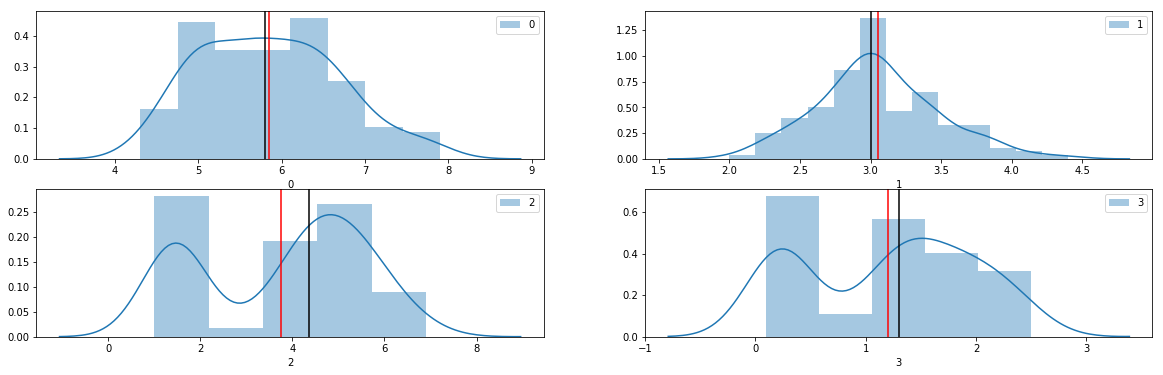

In [23]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(X.columns):
    fig.add_subplot(221+i)
    sns.distplot(X[col], label=str(col))
    plt.axvline(X[col].mean(), c='red')
    plt.axvline(X[col].median(), c='black')
    plt.legend()

In [ ]:
X_dsk = pd.DataFrame(BoxCoxTransformer().fit_transform(X))

In [ ]:
stats_dsk = X_dsk.describe().T
stats_dsk['skew'] = skew(X_dsk)
stats_dsk

In [ ]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(X_dsk.columns):
    fig.add_subplot(221+i)
    sns.distplot(X_dsk[col], label=str(col))
    plt.axvline(X_dsk[col].mean(), c='red')
    plt.axvline(X_dsk[col].median(), c='black')
    plt.legend()

In [ ]:
X_log = np.log(X)

In [ ]:
stats_log = X_log.describe().T
stats_log['skew'] = skew(X_log)
stats_log

In [ ]:
X_cond = X_dsk.copy()
X_cond[2] = X[2]
X_cond[3] = X[3]

In [ ]:
stats_dsk = X_cond.describe().T
stats_dsk['skew'] = skew(X_cond)
stats_dsk

In [ ]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(X_cond.columns):
    fig.add_subplot(221+i)
    sns.distplot(X_cond[col], label=str(col))
    plt.axvline(X_cond[col].mean(), c='red')
    plt.axvline(X_cond[col].median(), c='black')
    plt.legend()